In [10]:
!pip install matplotlib

In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import string



In [47]:
df_data_orig = pd.read_csv('data.csv')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50000)
df_data_orig.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_outcome,date_of_birth,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10 years,2007-07-09 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7 years,2007-07-09 00:00:00,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6 years,2007-07-09 00:00:00,Neutered Male,2190,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10 years,2004-04-02 00:00:00,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16 years,1997-10-16 00:00:00,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner


In [13]:
df_data_orig.shape

(47803, 37)

In [14]:
df_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   animal_id_outcome           47803 non-null  object 
 1   dob_year                    47803 non-null  int64  
 2   dob_month                   47803 non-null  int64  
 3   age_upon_intake             47803 non-null  object 
 4   animal_type                 47803 non-null  object 
 5   breed                       47803 non-null  object 
 6   color                       47803 non-null  object 
 7   intake_condition            47803 non-null  object 
 8   intake_type                 47803 non-null  object 
 9   sex_upon_intake             47802 non-null  object 
 10  count                       47803 non-null  int64  
 11  age_upon_intake_(days)      47803 non-null  int64  
 12  age_upon_intake_(years)     47803 non-null  float64
 13  age_upon_intake_age_group   478

In [15]:
df_data_orig.iloc[0]

animal_id_outcome                               A006100
dob_year                                           2007
dob_month                                             7
age_upon_intake                                10 years
animal_type                                         Dog
breed                              Spinone Italiano Mix
color                                      Yellow/White
intake_condition                                 Normal
intake_type                                       Stray
sex_upon_intake                           Neutered Male
count                                                 1
age_upon_intake_(days)                             3650
age_upon_intake_(years)                              10
age_upon_intake_age_group                   (7.5, 10.0]
intake_datetime                     2017-12-07 00:00:00
intake_month                                         12
intake_year                                        2017
intake_monthyear                                

In [16]:
print(df_data_orig['count'].unique())
print(df_data_orig['intake_number'].unique())

[1]
[ 1.  2.  3.  4.  5.  6.  7.  8. 10. 11.  9. 12. 13.]


In [17]:
df_data = df_data_orig.drop(columns=['animal_id_outcome', 'age_upon_intake', 'count', 'time_in_shelter', 'date_of_birth', 'outcome_datetime', 'intake_datetime', 'intake_monthyear'])
df_data.head()

,dob_year,dob_month,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),...,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,2007,7,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,3650,10.0,...,3650,10.0,"(7.5, 10.0]",12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,2007,7,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2555,7.0,...,2555,7.0,"(5.0, 7.5]",12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,2007,7,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2190,6.0,...,2190,6.0,"(5.0, 7.5]",3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,2004,4,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,3650,10.0,...,3650,10.0,"(7.5, 10.0]",4,2014,2014-04,Monday,15,1.0,Missing
4,1997,10,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,5840,16.0,...,5840,16.0,"(15.0, 17.5]",11,2013,2013-11,Saturday,11,1.0,Return to Owner


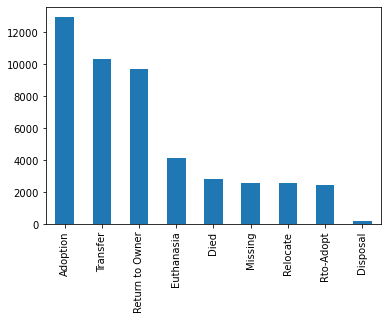

In [18]:
df_data['outcome_type'].value_counts().plot(kind="bar")

In [19]:
print ((df_data['outcome_type'].value_counts() / df_data.shape[0])*100)

Adoption           27.125913
Transfer           21.640901
Return to Owner    20.329268
Euthanasia          8.668912
Died                5.918039
Missing             5.436897
Relocate            5.382507
Rto-Adopt           5.125201
Disposal            0.372362
Name: outcome_type, dtype: float64


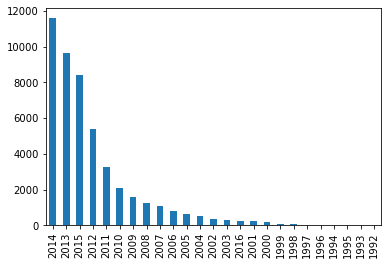

In [20]:
df_data['dob_year'].value_counts().plot(kind="bar")

In [21]:
#df_data.groupby('outcome_type')[col_name].value_counts().unstack().plot.bar(figsize=(7,7))

In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

all_numeric_columns = list(df_data.select_dtypes(include=numerics).columns)
all_non_numeric_columns = list(df_data.select_dtypes(exclude=numerics).columns)
print(all_numeric_columns, len(all_numeric_columns), "\n*******************\n", all_non_numeric_columns, len(all_non_numeric_columns))

['dob_year', 'dob_month', 'age_upon_intake_(days)', 'age_upon_intake_(years)', 'intake_month', 'intake_year', 'intake_hour', 'intake_number', 'time_in_shelter_days', 'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'outcome_month', 'outcome_year', 'outcome_hour', 'outcome_number'] 15 
*******************
 ['animal_type', 'breed', 'color', 'intake_condition', 'intake_type', 'sex_upon_intake', 'age_upon_intake_age_group', 'intake_weekday', 'age_upon_outcome', 'sex_upon_outcome', 'age_upon_outcome_age_group', 'outcome_monthyear', 'outcome_weekday', 'outcome_type'] 14


In [23]:
timeseriescols = [col for col in all_numeric_columns if col.endswith('_hour') or col.endswith('_year') or col.endswith('_month')]
print(timeseriescols, len(timeseriescols))

['dob_year', 'dob_month', 'intake_month', 'intake_year', 'intake_hour', 'outcome_month', 'outcome_year', 'outcome_hour'] 8


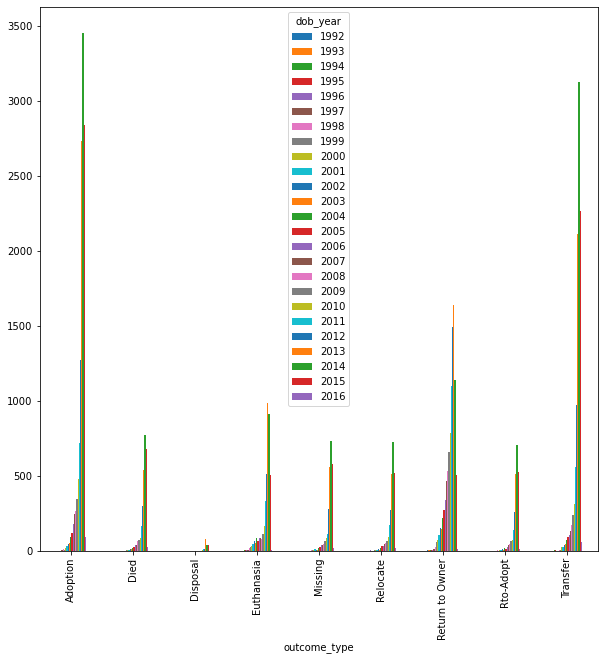

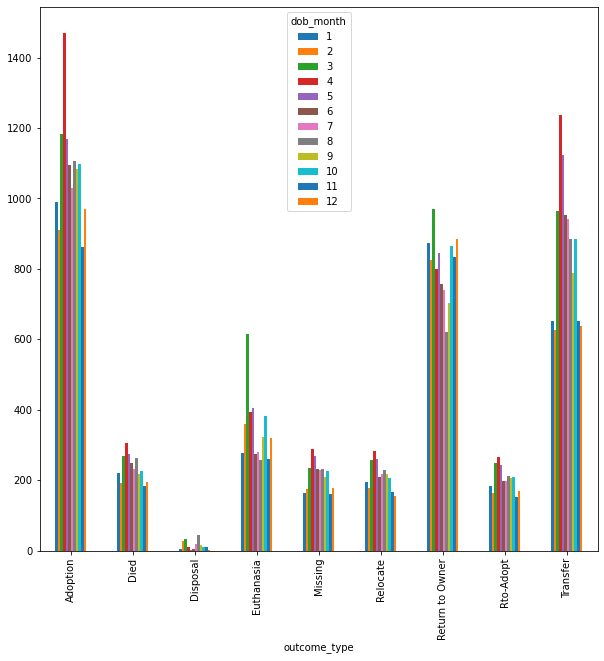

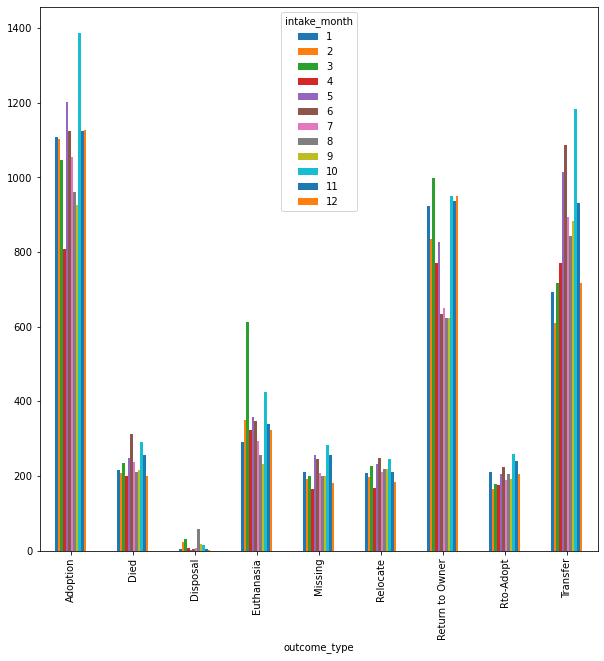

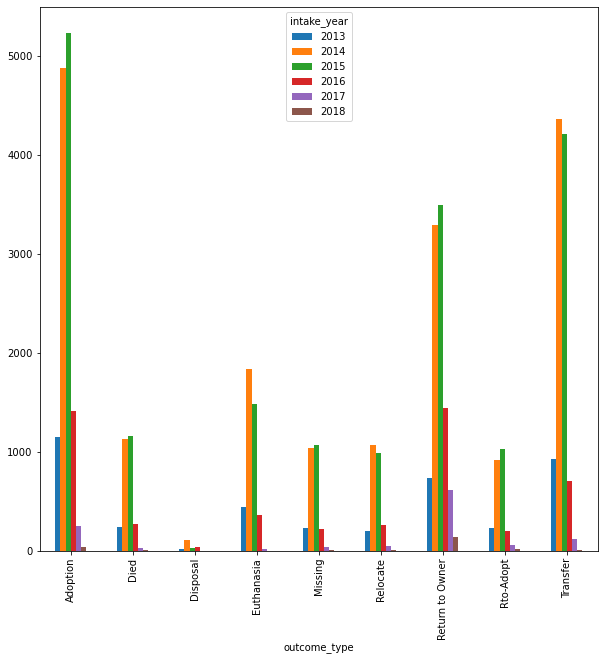

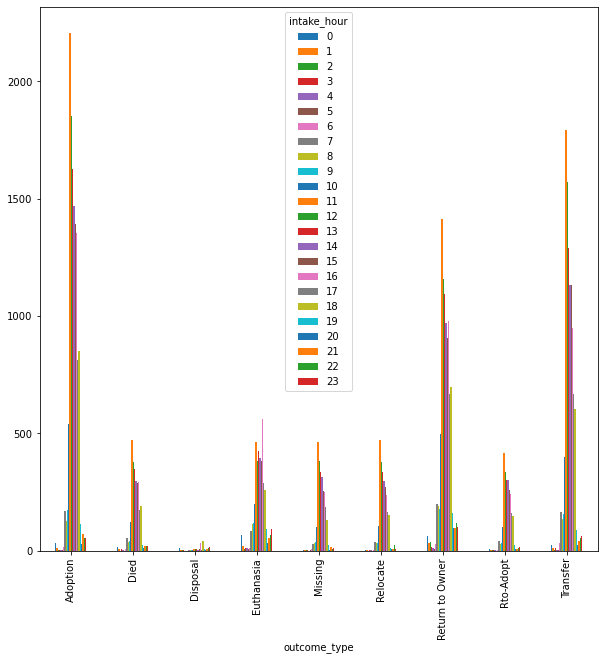

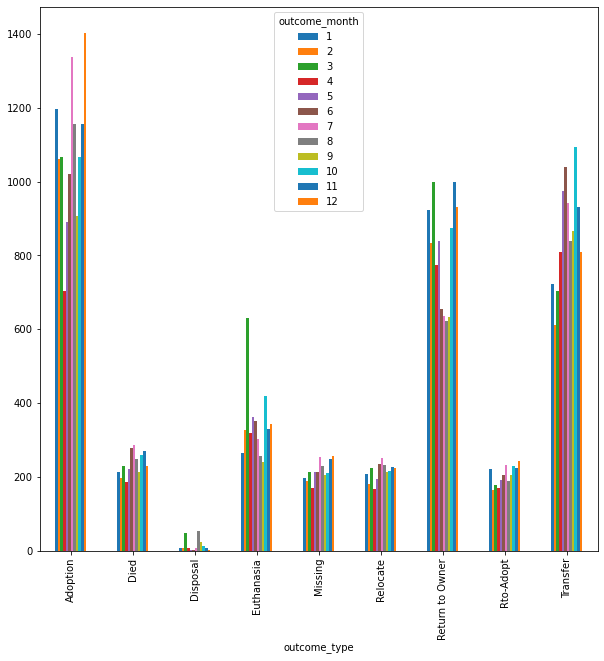

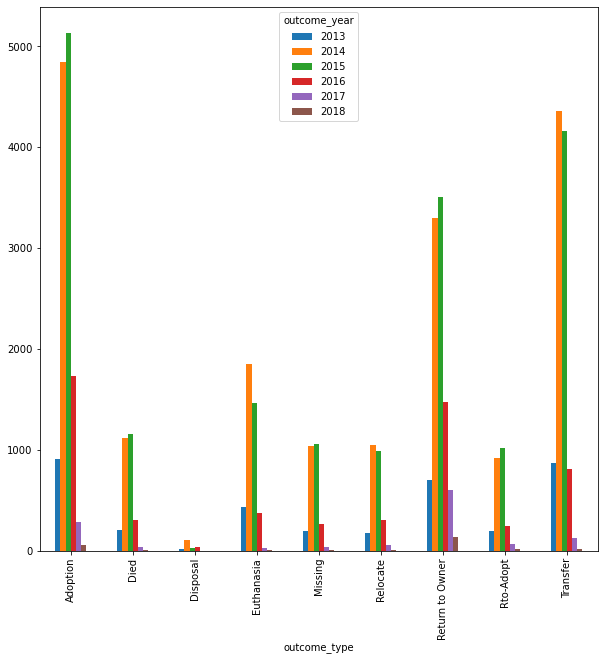

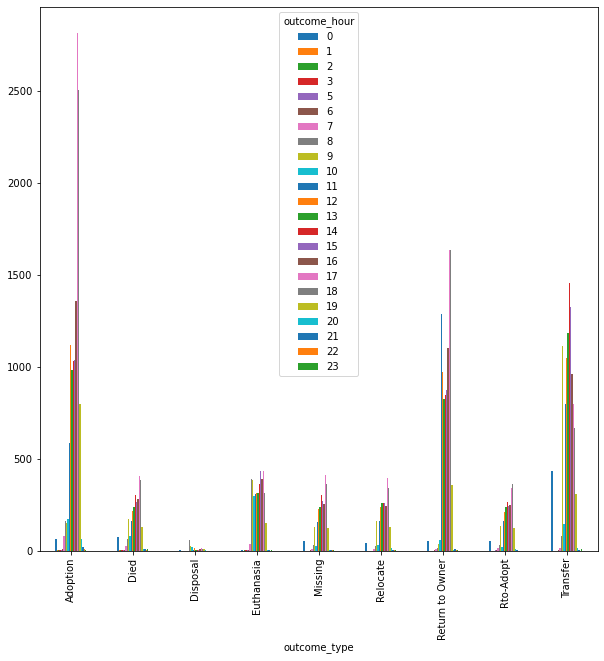

In [24]:
for col in timeseriescols:
    df_data.groupby('outcome_type')[col].value_counts().unstack().plot(kind="bar", figsize=(10,10))

In [25]:
for col in timeseriescols:
    df_data.groupby('outcome_type')[col].value_counts().reset_index(name="count").to_csv('csvs/' + col + '.csv')

dob_year


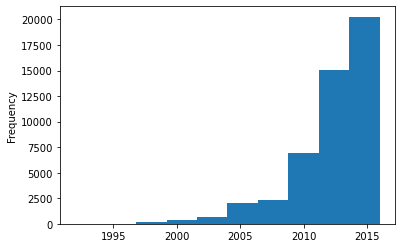

In [26]:
print(timeseriescols[0])
df_data[timeseriescols[0]].plot(kind="hist")

dob_month


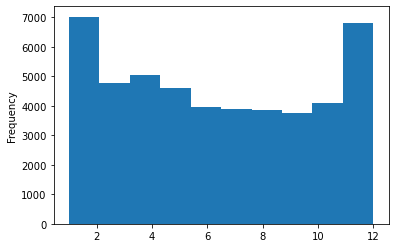

In [27]:
print(timeseriescols[1])
df_data[timeseriescols[1]].plot(kind="hist")

intake_month


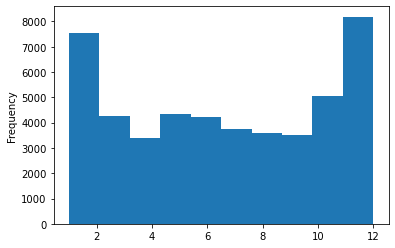

In [28]:
print(timeseriescols[2])
df_data[timeseriescols[2]].plot(kind="hist")

intake_year


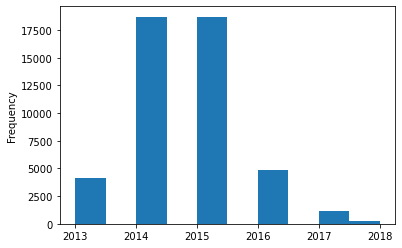

In [29]:
print(timeseriescols[3])
df_data[timeseriescols[3]].plot(kind="hist")

intake_hour


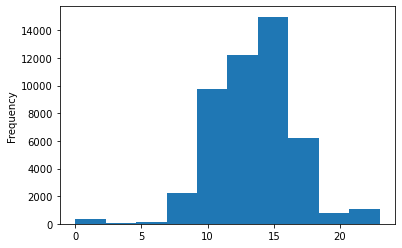

In [30]:
print(timeseriescols[4])
df_data[timeseriescols[4]].plot(kind="hist")

outcome_month


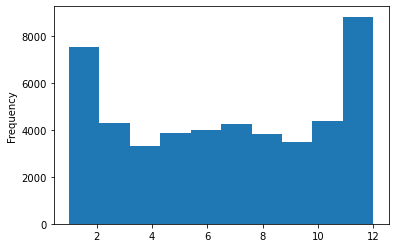

In [31]:
print(timeseriescols[5])
df_data[timeseriescols[5]].plot(kind="hist")

outcome_year


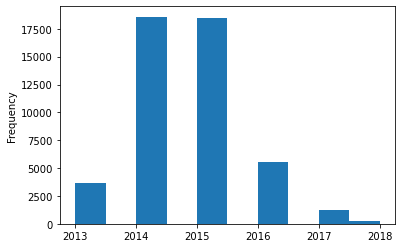

In [32]:
print(timeseriescols[6])
df_data[timeseriescols[6]].plot(kind="hist")

In [33]:
all_descriptive_features = []
"""for timeseriescol in timeseriescols:
    all_numeric_columns.remove(timeseriescol)"""
for col in all_numeric_columns:
    print("***************************************\n\nColumn Name : ", col)
    col_mean = df_data[col].mean()
    col_median = df_data[col].median()
    col_mode = df_data[col].mode()
    col_std = df_data[col].std()
    percentiles = np.percentile(df_data[col].values, q=[0, 25, 50, 75, 100])
    all_descriptive_features.append([col , col_mean, col_median, col_mode, col_std, percentiles[0], percentiles[1], percentiles[2], percentiles[3], percentiles[4]])
    print(col, col_mean, col_median, col_mode, col_std, percentiles[0], percentiles[1], percentiles[2], percentiles[3], percentiles[4])
    
    
    """for outcome_value in df_data['outcome_type'].unique():
        print(outcome_value)
        df_ind_outcome = df_data[df_data['outcome_type'] == outcome_value]
        outcome_col_mean = df_ind_outcome[col].mean()
        outcome_col_median = df_ind_outcome[col].median()
        outcome_col_mode = df_ind_outcome[col].mode()
        outcome_col_std = df_ind_outcome[col].std()
        outcome_percentiles = np.percentile(df_ind_outcome[col].values, q=[0, 25, 50, 75, 100])
        print(outcome_col_mean, outcome_col_median, outcome_col_mode, outcome_col_std, outcome_percentiles)"""
    

df_data[all_numeric_columns].describe()
df_descriptive = pd.DataFrame(all_descriptive_features, columns=['column_name', 'mean', 'median', 'mode', 'standard_deviation', 'Q0', 'Q25', 'Q50', 'Q75', 'Q100'])
df_descriptive.to_csv('csvs/numerical_features_descriptive.csv', index=False)
df_descriptive.head()

***************************************

Column Name :  dob_year
dob_year 2012.197728176056 2013.0 0    2014
dtype: int64 3.0682550780337943 1992.0 2011.0 2013.0 2014.0 2016.0
***************************************

Column Name :  dob_month
dob_month 6.337531117293894 6.0 0    4
dtype: int64 3.3420379277018304 1.0 4.0 6.0 9.0 12.0
***************************************

Column Name :  age_upon_intake_(days)
age_upon_intake_(days) 841.6799154864757 365.0 0    365
dtype: int64 1100.557953167262 0.0 60.0 365.0 1095.0 8030.0
***************************************

Column Name :  age_upon_intake_(years)
age_upon_intake_(years) 2.305972371195824 1.0 0    1.0
dtype: float64 3.015227268951403 0.0 0.1643835616438356 1.0 3.0 22.0
***************************************

Column Name :  intake_month
intake_month 6.5961132146518 7.0 0    10
dtype: int64 3.4601715083787963 1.0 4.0 7.0 10.0 12.0
***************************************

Column Name :  intake_year
intake_year 2014.6000460222162 2015

,column_name,mean,median,mode,standard_deviation,Q0,Q25,Q50,Q75,Q100
0,dob_year,2012.197728,2013.0,0 2014 dtype: int64,3.068255,1992.0,2011.000000,2013.0,2014.0,2016.0
1,dob_month,6.337531,6.0,0 4 dtype: int64,3.342038,1.0,4.000000,6.0,9.0,12.0
2,age_upon_intake_(days),841.679915,365.0,0 365 dtype: int64,1100.557953,0.0,60.000000,365.0,1095.0,8030.0
3,age_upon_intake_(years),2.305972,1.0,0 1.0 dtype: float64,3.015227,0.0,0.164384,1.0,3.0,22.0
4,intake_month,6.596113,7.0,0 10 dtype: int64,3.460172,1.0,4.000000,7.0,10.0,12.0


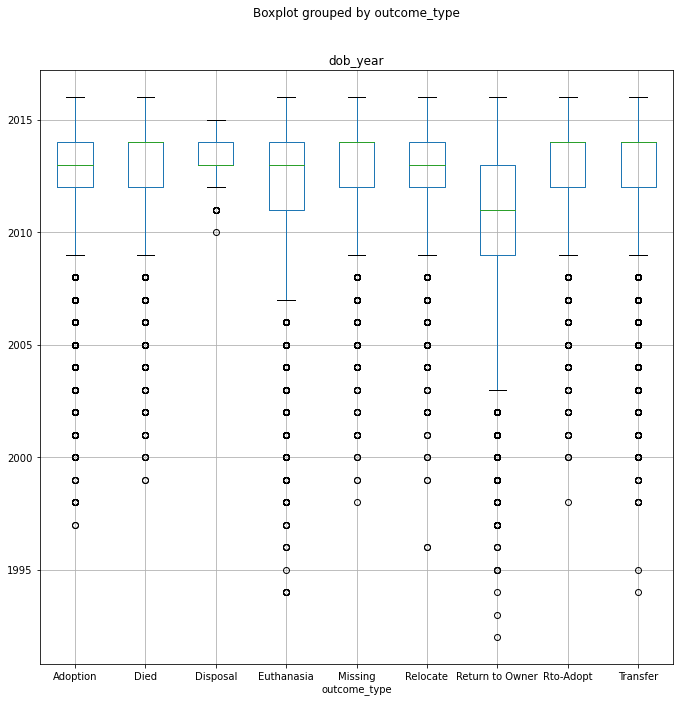

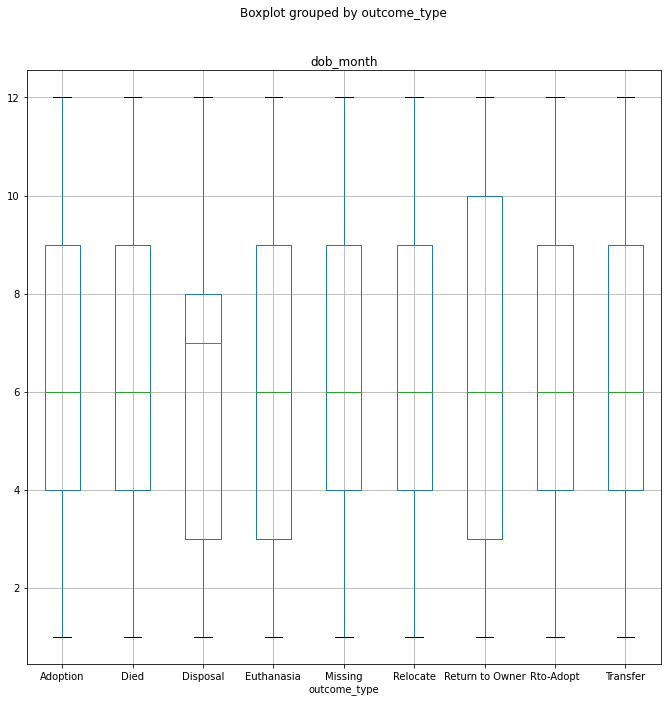

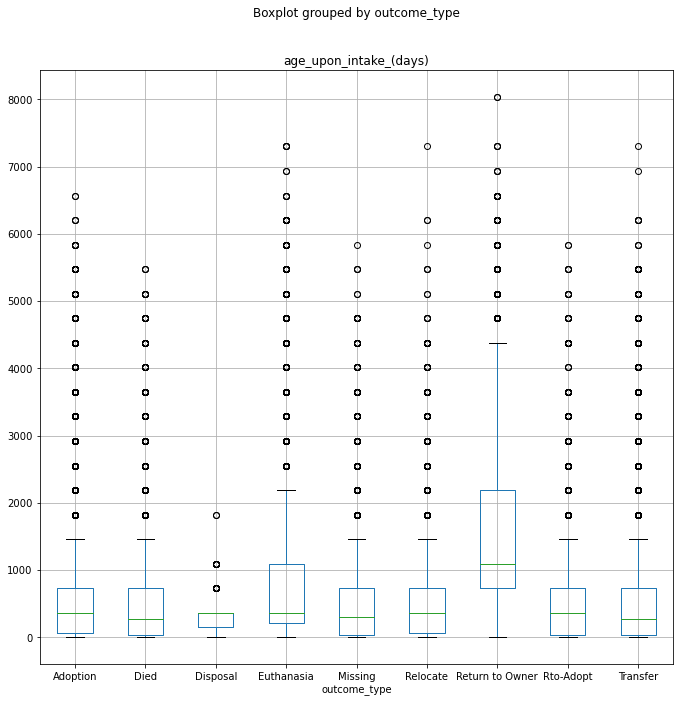

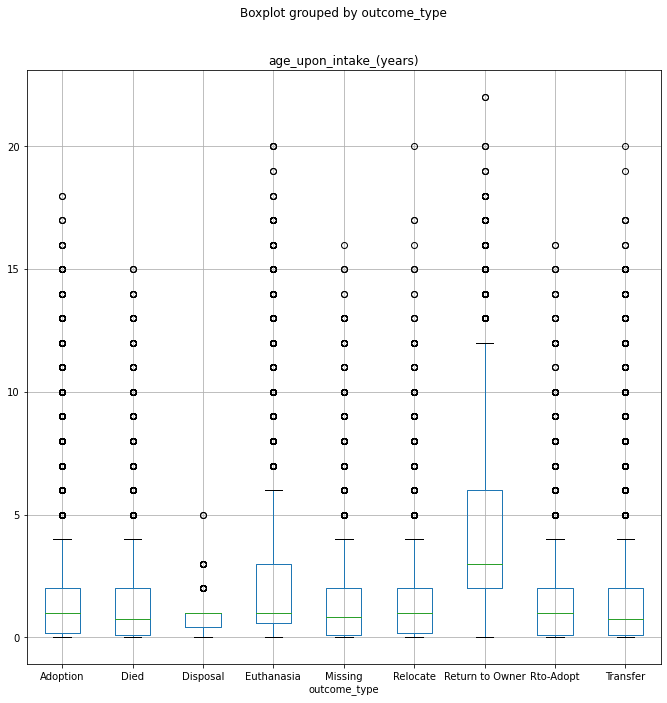

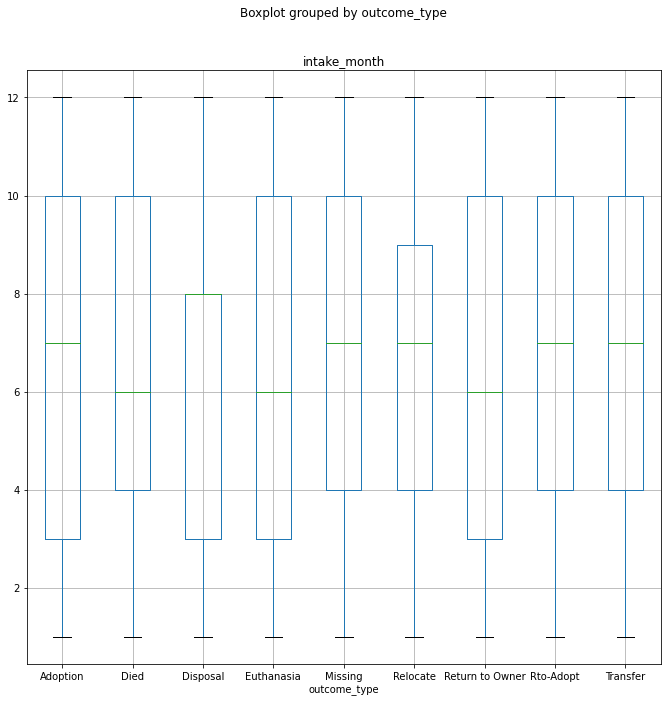

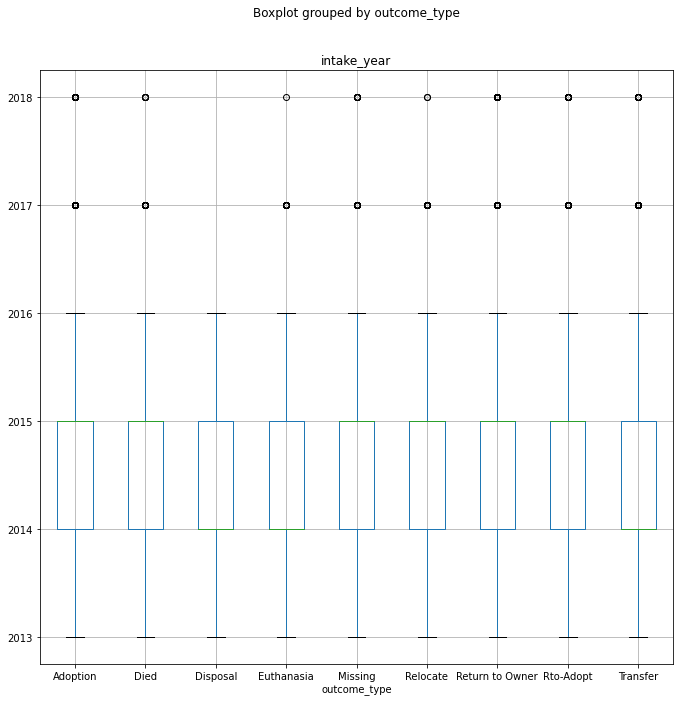

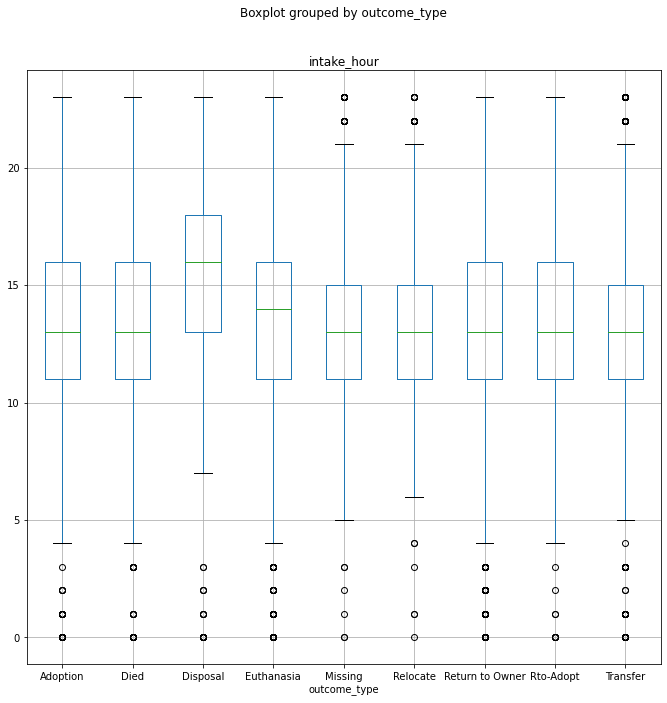

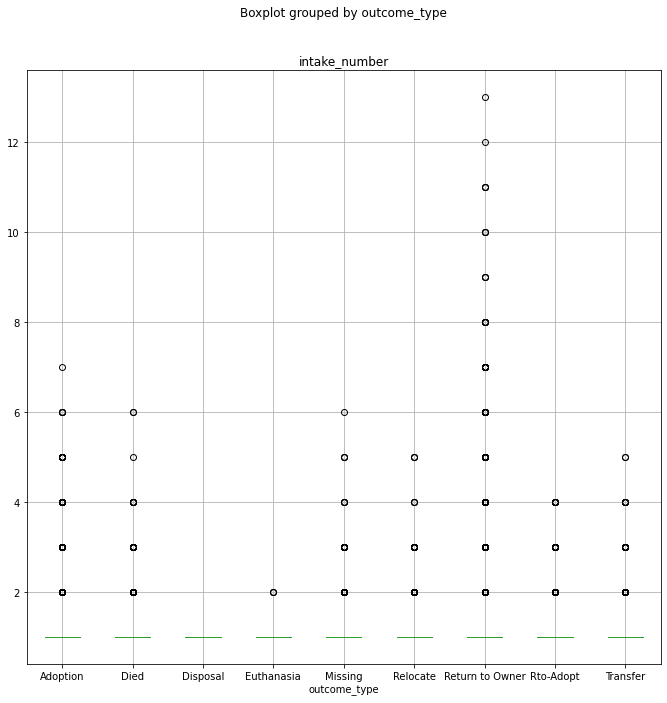

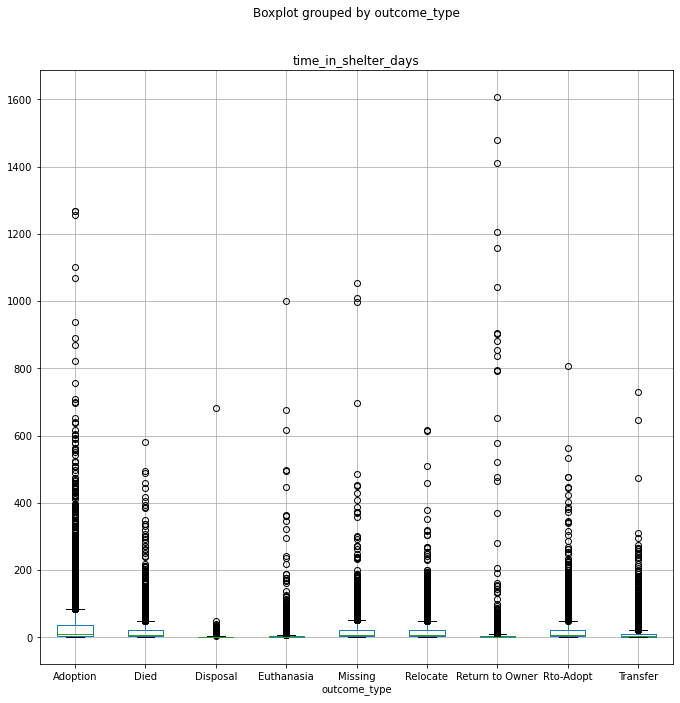

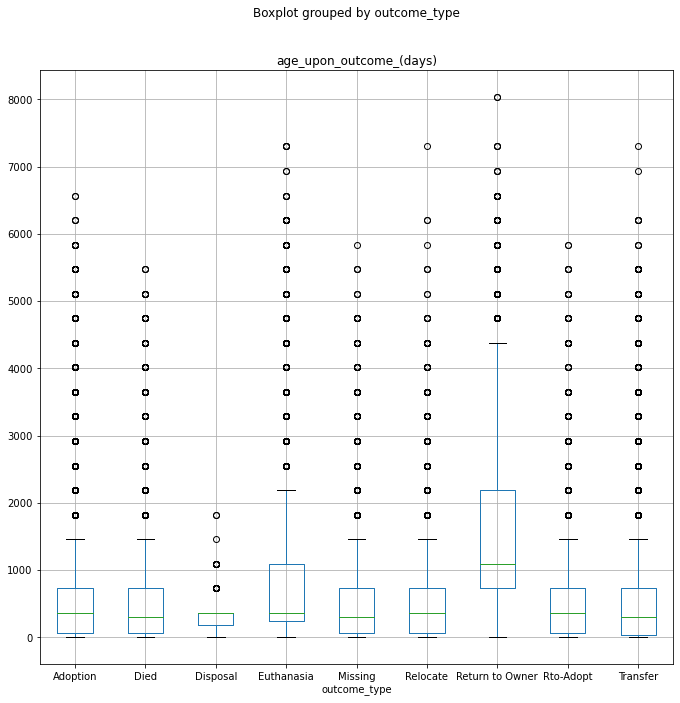

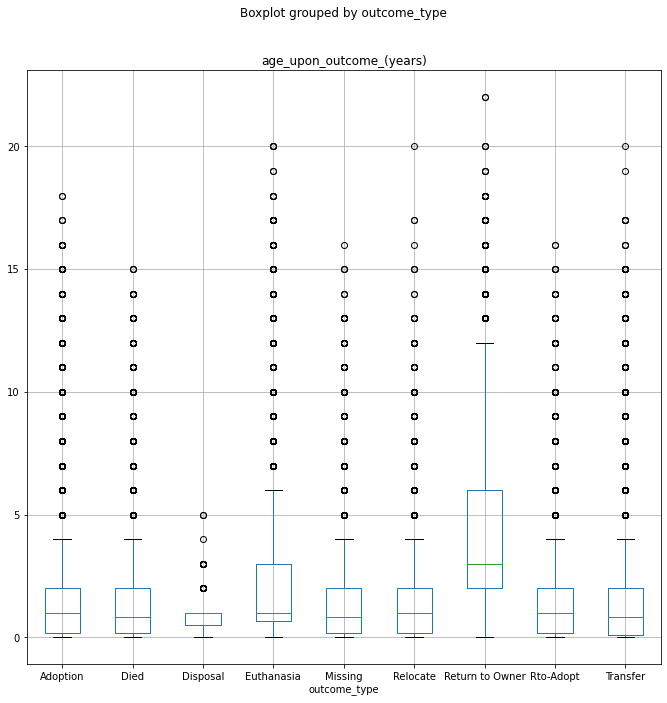

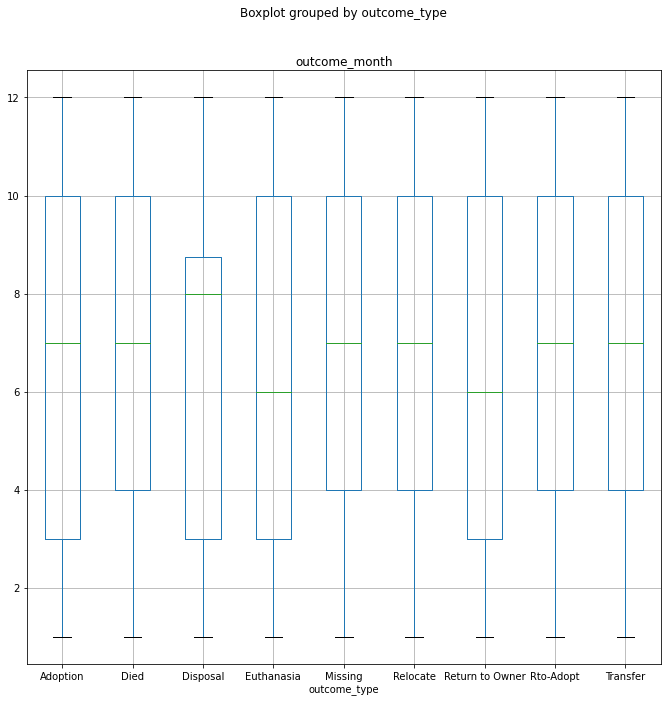

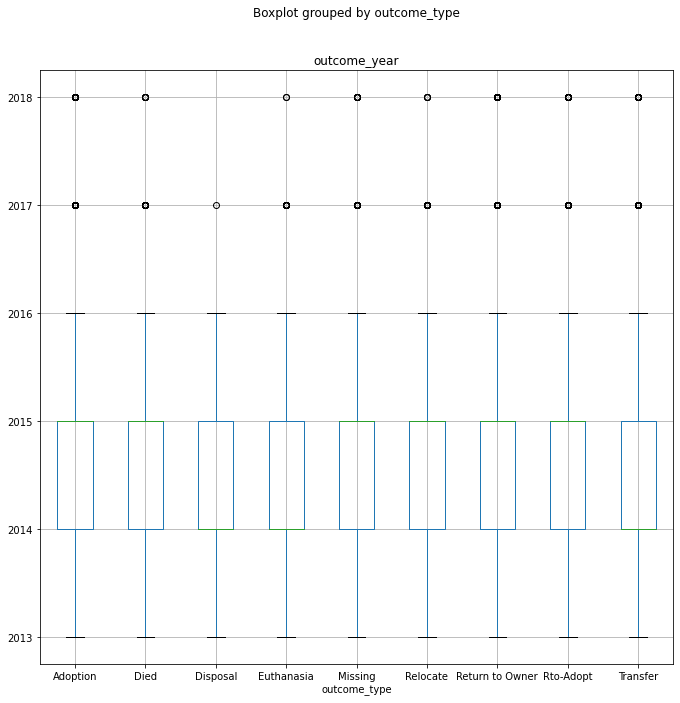

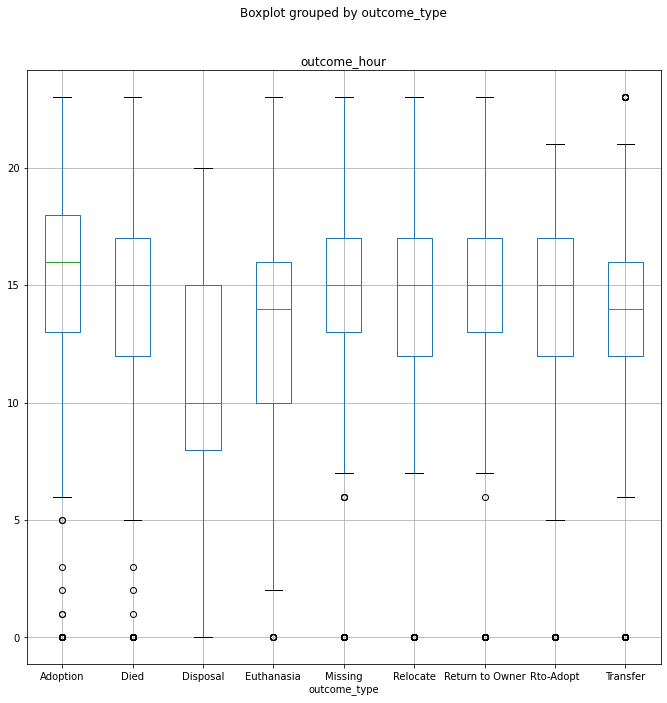

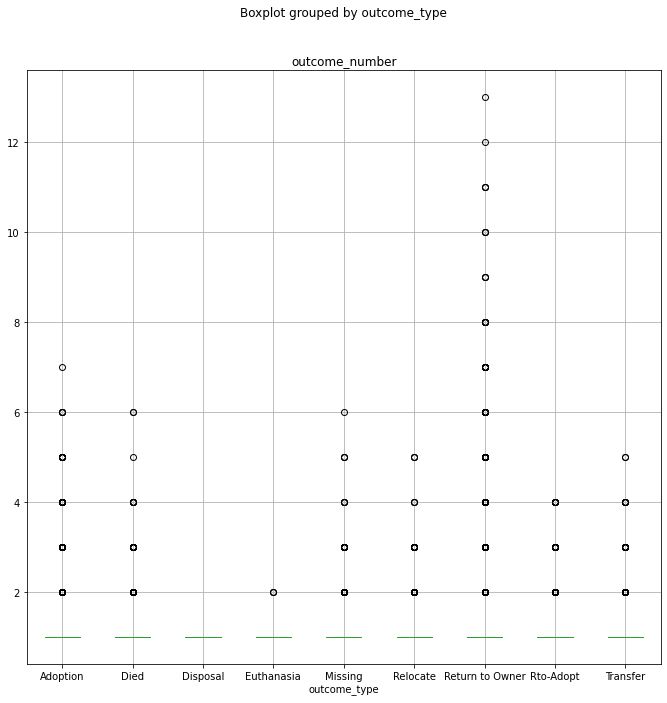

In [34]:
for col in all_numeric_columns:
    temp = df_data.boxplot(by ='outcome_type', column =[col], figsize=(11,11))
    temp.get_figure().savefig('plots/box_'+col+'.png')

<ipython-input-35-36694f72f654>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp.get_figure().show()
<ipython-input-35-36694f72f654>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp.get_figure().show()
<ipython-input-35-36694f72f654>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp.get_figure().show()
<ipython-input-35-36694f72f654>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp.get_figure().show()
<ipython-input-35-36694f72f654>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp.get_figure().sh

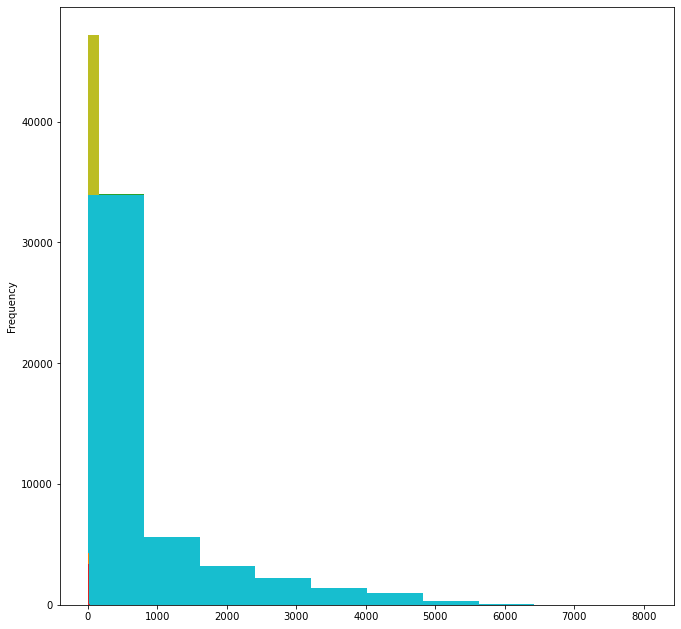

In [35]:
for col in all_numeric_columns:
    temp = df_data[col].plot(kind="hist", figsize=(11,11))
    temp.get_figure().show()
    temp.get_figure().savefig('plots/hist_'+col+'.png')

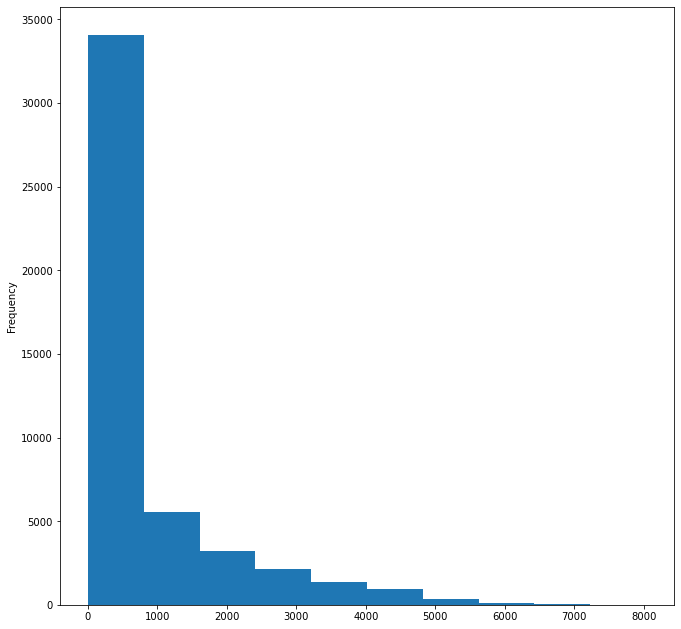

In [36]:
col = 'age_upon_intake_(days)'
df_data[col].plot(kind="hist", figsize=(11,11))

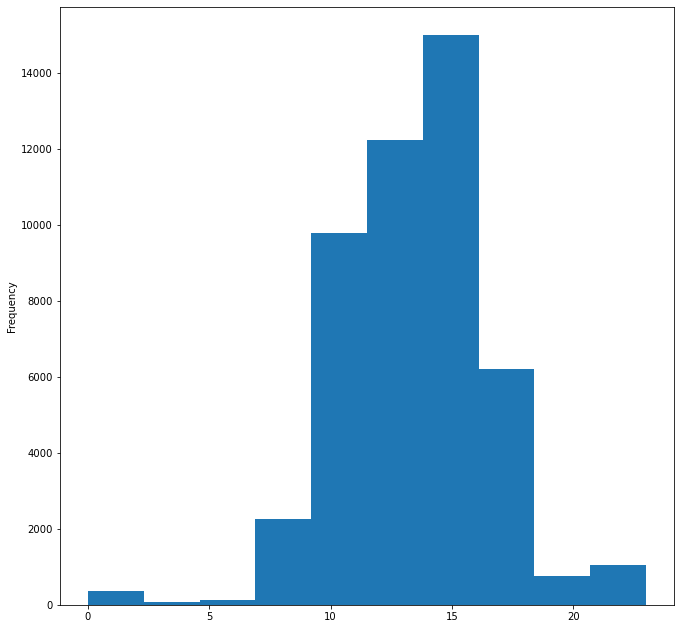

In [37]:
temp = df_data['intake_hour'].plot(kind="hist",by ='outcome_type', figsize=(11,11))
temp.get_figure().savefig('plots/hist_'+ 'intake_hour' +'.png')

In [38]:
for non_numeric_column in all_non_numeric_columns:
    temp_df = (df_data[non_numeric_column].value_counts() / df_data.shape[0])*100
    for index in temp_df.index:
        if temp_df[index] < 2:
            df_data.loc[df_data[non_numeric_column] == index, non_numeric_column]  = "Other"
    print(df_data[non_numeric_column].value_counts())

Dog      28222
Cat      16951
Other     2630
Name: animal_type, dtype: int64
Other                       22853
Domestic Shorthair Mix      13339
Pit Bull Mix                 3820
Chihuahua Shorthair Mix      2974
Labrador Retriever Mix       2457
Domestic Medium Hair Mix     1284
German Shepherd Mix          1076
Name: breed, dtype: int64
Other                19688
Black/White           4975
Black                 3781
Brown Tabby           2500
Brown                 2071
White                 1694
Brown/White           1668
Tan/White             1466
Brown Tabby/White     1429
Tricolor              1366
Blue/White            1288
Orange Tabby          1251
Black/Tan             1234
White/Black           1224
Tan                   1146
White/Brown           1022
Name: color, dtype: int64
Normal     41885
Injured     2417
Sick        1931
Nursing     1156
Other        414
Name: intake_condition, dtype: int64
Stray              33345
Owner Surrender     9110
Public Assist       3166
Wild

***************************************

Column Name :  animal_type
Dog      0.590381
Cat      0.354601
Other    0.055017
Name: animal_type, dtype: float64
***************************************

Column Name :  breed
Other                       0.478066
Domestic Shorthair Mix      0.279041
Pit Bull Mix                0.079911
Chihuahua Shorthair Mix     0.062214
Labrador Retriever Mix      0.051398
Domestic Medium Hair Mix    0.026860
German Shepherd Mix         0.022509
Name: breed, dtype: float64
***************************************

Column Name :  color
Other                0.411857
Black/White          0.104073
Black                0.079095
Brown Tabby          0.052298
Brown                0.043324
White                0.035437
Brown/White          0.034893
Tan/White            0.030668
Brown Tabby/White    0.029894
Tricolor             0.028576
Blue/White           0.026944
Orange Tabby         0.026170
Black/Tan            0.025814
White/Black          0.025605
Tan          

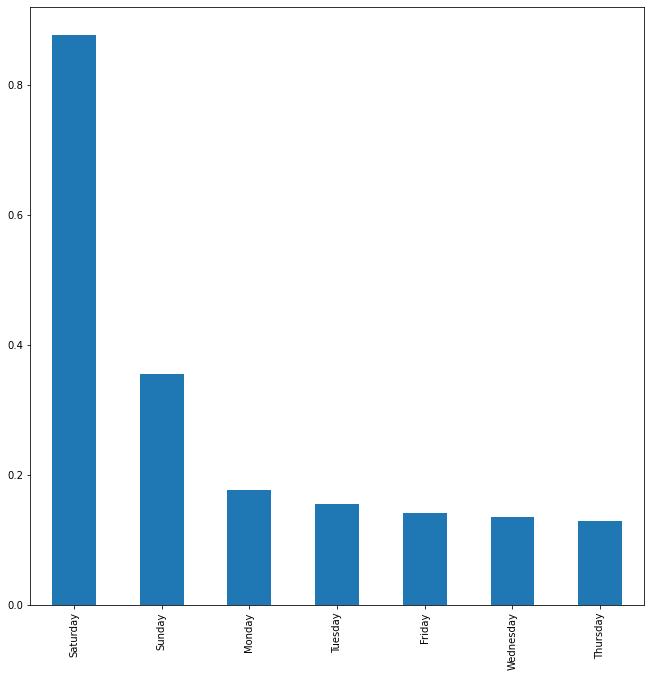

In [39]:
all_non_numeric_columns_dfs = []
for non_numeric_column in all_non_numeric_columns[:-1]:
    print("***************************************\n\nColumn Name : ", non_numeric_column)
    temp_value_count_df = df_data[non_numeric_column].value_counts(normalize=True)
    all_non_numeric_columns_dfs.append(temp_value_count_df)
    print(temp_value_count_df)
    temp = temp_value_count_df.plot(kind="bar", figsize=(11,11))
    temp.get_figure().savefig('plots/bar_'+non_numeric_column+'.png')

for col in all_non_numeric_columns:
    df_data.groupby('outcome_type')[col].value_counts().unstack().plot(kind="bar", figsize=(10,10))

In [40]:
for col_name in all_non_numeric_columns[:-1]:
    df_analysis = df_data.groupby('outcome_type')[col_name].value_counts().reset_index(name="count")
    df_analysis['count_percentage'] = (df_analysis['count']/(df_analysis['count'].sum()))*100
    df_analysis.to_csv('csvs/' + col_name + '.csv', index=False)
    print(df_analysis, '\n\n*******************************\n\n')

       outcome_type animal_type  count  count_percentage
0          Adoption         Dog   8211         17.176746
1          Adoption         Cat   4679          9.788089
2          Adoption       Other     77          0.161078
3              Died         Dog   1443          3.018639
4              Died         Cat   1279          2.675564
5              Died       Other    107          0.223835
6        Euthanasia       Other   1830          3.828212
7        Euthanasia         Dog   1305          2.729954
8        Euthanasia         Cat   1009          2.110746
9           Missing         Dog   1433          2.997720
10          Missing         Cat   1124          2.351317
11          Missing       Other     42          0.087861
12            Other       Other    173          0.361902
13            Other         Dog      3          0.006276
14            Other         Cat      2          0.004184
15         Relocate         Dog   1386          2.899400
16         Relocate         Cat

42         Transfer            Other     89          0.186181 

*******************************


       outcome_type      intake_type  count  count_percentage
0          Adoption            Stray   9219         19.285400
1          Adoption  Owner Surrender   3460          7.238039
2          Adoption    Public Assist    274          0.573186
3          Adoption            Other     12          0.025103
4          Adoption         Wildlife      2          0.004184
5              Died            Stray   2057          4.303077
6              Died  Owner Surrender    644          1.347196
7              Died         Wildlife     63          0.131791
8              Died    Public Assist     58          0.121331
9              Died            Other      7          0.014643
10       Euthanasia         Wildlife   1692          3.539527
11       Euthanasia            Stray   1564          3.271761
12       Euthanasia  Owner Surrender    506          1.058511
13       Euthanasia    Public Assi

   outcome_type intake_weekday  count  count_percentage
0      Adoption       Saturday   2058          4.305169
1      Adoption      Wednesday   2010          4.204757
2      Adoption         Monday   1918          4.012300
3      Adoption         Friday   1810          3.786373
4      Adoption       Thursday   1766          3.694329
..          ...            ...    ...               ...
58     Transfer         Monday   1562          3.267577
59     Transfer      Wednesday   1505          3.148338
60     Transfer         Friday   1391          2.909859
61     Transfer       Thursday   1386          2.899400
62     Transfer         Sunday   1278          2.673472

[63 rows x 4 columns] 

*******************************


    outcome_type age_upon_outcome  count  count_percentage
0       Adoption         2 months   2804          5.865741
1       Adoption           1 year   2143          4.482982
2       Adoption          2 years   1646          3.443299
3       Adoption            Other

   outcome_type outcome_weekday  count  count_percentage
0      Adoption        Saturday   2751          5.754869
1      Adoption          Sunday   2649          5.541493
2      Adoption         Tuesday   1654          3.460034
3      Adoption          Monday   1646          3.443299
4      Adoption          Friday   1509          3.156706
..          ...             ...    ...               ...
58     Transfer          Friday   1534          3.209004
59     Transfer       Wednesday   1494          3.125327
60     Transfer        Thursday   1438          3.008179
61     Transfer        Saturday   1309          2.738322
62     Transfer          Sunday   1283          2.683932

[63 rows x 4 columns] 

*******************************




In [41]:
df_data.columns

Index(['dob_year', 'dob_month', 'animal_type', 'breed', 'color',
       'intake_condition', 'intake_type', 'sex_upon_intake',
       'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_month', 'intake_year',
       'intake_weekday', 'intake_hour', 'intake_number',
       'time_in_shelter_days', 'age_upon_outcome', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'outcome_type'],
      dtype='object')

In [44]:
all_numeric_columns

['dob_year',
 'dob_month',
 'age_upon_intake_(days)',
 'age_upon_intake_(years)',
 'intake_month',
 'intake_year',
 'intake_hour',
 'intake_number',
 'time_in_shelter_days',
 'age_upon_outcome_(days)',
 'age_upon_outcome_(years)',
 'outcome_month',
 'outcome_year',
 'outcome_hour',
 'outcome_number']

In [46]:
all_non_numeric_columns

['animal_type',
 'breed',
 'color',
 'intake_condition',
 'intake_type',
 'sex_upon_intake',
 'age_upon_intake_age_group',
 'intake_weekday',
 'age_upon_outcome',
 'sex_upon_outcome',
 'age_upon_outcome_age_group',
 'outcome_monthyear',
 'outcome_weekday',
 'outcome_type']